# Deep Learning Homework 4



## PART 1: MNIST as a sequence (follow-up from last assignment)
In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. The images have a resolution of $28\times 28$ pixels. This is the same dataset as in Assignment 1, but we will be using this data a bit differently this time around. Since this assignment will be focusing on recurrent networks that model sequential data, we will be looking at each image as a sequence: the networks you train will be "reading" the image one row at a time, from top to bottom (we could even do pixel-by-pixel, but in the interest of time we'll do row-by-row which is faster).  Also, we will work with a binarized version of MNIST -- we constrain the values of the pixels to be either $0$ or $1$. You can do this by applying the method `binarize`, defined below, to the raw images.

<img src="https://github.com/bodono/files/blob/master/mnist_as_sequence.png?raw=true">

* We take the MNIST images, binarise them, and interpret them as a sequence of pixels from top-left to bottom-right. ("Task 2" refers to the next homework, wherein you will be using the sequence for pixel prediction).

## Recurrent Models for MNIST

As discussed in the lectures, there are various ways and tasks for which we can use recurrent models. A depiction of the most common scenarios is available in the Figure below. In this assignment and the following one we will look at two of these forms: **many-to-one** (sequence to label/decision) and the **many-to-many** scenario where the model receives an input and produces an output at every time step. You will use these to solve the following tasks: i) pixel prediction  and ii) in-painting.

<img src="https://github.com/bodono/files/blob/master/rnn_models.png?raw=true">
* ([Figure adapted from Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness)). You will be implementing variants of *many-to-one* for classification (in this homework), and *many-to-many* for prediction (in the next homework).


## Task 1: (Next) Pixel prediction (35 pts)
In this part, you will train a **many-to-many** recurrent model: at each time $t$, the model receives as input a pixel value $x_t$ and tries to predict the next pixel in the images $x_{t+1}$ based on the current input and the recurrent state. Thus, your output function is now a probability over the value of pixel $x_{t+1}$ -- which can be either $0$ or $1$ (black or white).
\begin{equation}
    \hat{p}(x_{t+1}|x_{1:t}) = g(x_{t}, h_{t}, c_{t})
\end{equation}
Once we get to observe the actual value of $x_{t+1}$ at the next time-step, we can compute the cross-entropy between our predicted probability $\hat{p}(x_{t+1}|x_{1:t})$ and the observed value (pixel in the image). We can (and will) do that for every time-step prediction within a sequence. This will provide us with the training signal for optimizing the parameters of the mapping $g$ and the recurrent connections -- remember these are shared!, they do not change with $t$.





### Optimization
Use the Adam optimizer (with default settings other than the learning rate) for training.

**[Optional]** Sometimes dropout has been shown to be beneficial in training recurrent models, so feel free to use it or any other form of regularization that seems to improve performance. It might be also worth trying out batch-normalization. [Reference](https://arxiv.org/pdf/1603.09025.pdf).

### Models: Your models will have the following structure:
1. [(Red Block)] The *input* (current binarised row of pixels) can be fed directly into the recurrent connection without  much further pre-processing.
2. [(Blue Block)] The *output* (probabilities over the activation of the pixel) is produced by looking at the last output of the recurrent units, transforming them via an affine transformation.
3. [(Green Block)] For the *recurrent* part of the network, please implement and compare the following architectures:
    * LSTM with 32 units. **[15 pts]**
    
    **OR**
    
    * GRU with 32 units. **[15 pts]**

Your network should look like:
\begin{equation}
\textrm{Input} \Rightarrow \textrm{RNN cell} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}
\end{equation}
You might find the function `tf.nn.dynamic_rnn` useful.

### Hyper-parameters 
For all cases train the model with these hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001, *batch_size*=256, *fully_connected_hidden_units=64*

With these hyper-parameters you should give you a good perfomance on both GRUs/LSTMs. It is worth noting that in $5$ epochs the model has yet converged, but in the interest of time (the training should have $\approx$ 1h). That being said, feel free to try other settings, there are certainly better choices, but please report the results with these exact hyper-parameters and/or train for longer -- the models should still improve (convergence is achieved around 25-30 epochs). 

### Tasks:

1) Implement and train the previously described model (choose either GRU **or** LSTM). Please report the *cross-entropy* on the *test set* and *training set* of the models trained. Use the `plot_summary_table` method below to format the table. Provide the learning curves (both training and testing loss) -- choose appropiate reporting interval here (at least 20 points).

2) Using the previously trained model, visualize the 1-step predictions, 10-step predictions, one row prediction (28 steps) and filling out the image (fill out all the pixels using the recurrent model). 

*   **Generate a small in-painting dataset.** Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

*   **Predict missing parts and compare with GT**. Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).
Report the cross-entropy of your in-paintings for the trained model at beginning of training(0 epochs), after 1 epoch and at the end of training. Discuss the results: contrasting long/short time prediction; compare these with the cross-entropy of the ground truth images. For multiple steps in-paintings, average the loss over $10$ samples. **[10 pts]**

*   **Visualize completing the image**. Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include *a successful example, failure example and one that displays high variance between samples.* For each example picked, please provide $5$ samples for the last three scenarios (10, 28, 300 pixels) and $1$ for the 1-pixel prediction -- total 16 samples/exampls. The samples should be generated recursively by sampling the generative process provided by the trained recurrent connections. Total number of in-painting to report: 16 samples x 3 examples = 48 **[10 pts]**



## Task 2: Using pixel-to-pixel: In-painting task (25 pts)

Using the models trained in the previous section, please in-paint the missing pixels in the following datasets:
* [One-pixel missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/one_pixel_inpainting.npy)
* [Window of 2x2 pixels missing](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/2X2_pixels_inpainting.npy)

This is similar to Task 1.b, but now you have information not only about the past(previous pixels in the image) but also future (pixels that come after your predictive target)

### Results
1) Provide the formula used to compute the probability over the missing pixel and respectively for the missing patch **[5+5 pts]**

2) Visualize the most probable in-painting, according to your model. How does this compare to the ground truth? (Compare cross-entropy between your most probable sample and the ground truth). Explain the difference. It is enough to include just one example per task/dataset. **[10 pts]**


### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


# Imports and utility functions (do not modify!)

In [0]:
#@title Import libraries
#@test {"output": "ignore"}

# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

# Binarize the images
def binarize(images, threshold=0.1):
  return (threshold < images).astype('float32')

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 783])
  y = tf.placeholder(tf.float32, [None, 783])
  return x, y

# Generate summary table of results. This function expects a dict with the
# following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
# list of tuples consisting of (test_loss, test_accuracy), and the list is
# ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training):
# {
#  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
# }
def plot_summary_table(experiment_results):
  # Fill Data.
  cell_text = []
  columns = ['(Beginning - 0 epochs)', '(Mid-training - 1 epoch)', '(End of training - 5 epochs)']
  for k, v in experiment_results.iteritems():
    rows = ['Test loss', 'Test accuracy']
    cell_text=[[],[]]
    for (l, _) in v:
      cell_text[0].append(str(l))
    for (_, a) in v:
      cell_text[1].append(str(a))

    fig=plt.figure(frameon=False)
    ax = plt.gca()
    the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
    the_table.scale(2, 8)
    # Prettify.
    ax.patch.set_facecolor('None')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.text(-0.73, 0.9, k, fontsize=18)
    
    
    
def plot_learning_curves(training_loss, testing_loss):
  plt.figure()
  plt.plot(training_loss)
  plt.plot(testing_loss, 'g')
  plt.legend(['Training loss', 'Testing loss'])
   

# Train Models

Generate summary table of results. This function expects a dict with the
following structure: keys of 'LSTM' (or 'GRU') and the values for each key are a
list of tuples consisting of (test_loss, test_accuracy), and the list is
ordered as the results from 0 epoch (beginning of training), 1 epoch, 5 epochs (or end of training) i.e. expected dictionary (final performace only):

```python
{
  'LSTM': [(loss,acc), (loss, acc), (loss, acc)]
}
```

In [0]:
## Model parameters
l_rate = 0.001
epochs = [0,1,5]
batch_size = 256
n_units = 32
dense_units = 64
# Test dictionary
table_dict_test = {"GRU":[]}
table_dict_train = {"GRU":[]}
training_curve = []
test_curve = []

In [0]:
def softmax(pixels,logits,label):
  
  aux = tf.reshape(logits,[-1,783,2])
  logits_pixel_remove = aux[:,484:(484+pixels),:]
  logits_final = tf.reshape(logits_pixel_remove,[-1,2])
  
  label_pixel_remove = label[:,484:(484+pixels)]
  final_label = tf.cast(tf.reshape(label_pixel_remove,[-1]),tf.int64)
  
  cross_entropy = tf.reduce_mean(
  tf.nn.sparse_softmax_cross_entropy_with_logits(labels=final_label, logits=logits_final))
  return cross_entropy
  
  

In [33]:
#@title GRU 32

# Advisable to you GPU for this part
with tf.device('/device:GPU:*'):

  tf.reset_default_graph()
  
  # your model here.... 
  x, y = get_placeholders()
  h_range = tf.placeholder_with_default([0,783],(2,))
  x_time_step = tf.reshape(x, [-1, 783, 1]) ## We need 783 time steps of 1 pixel.
  y_label = tf.cast(tf.reshape(y,[-1]),tf.int64)
  mnist = get_data()
  eval_mnist = get_data()
  
  # We set the model 
  rnn_model = tf.contrib.rnn.GRUCell(n_units)
  outputs, state= tf.nn.dynamic_rnn(rnn_model, x_time_step, dtype=tf.float32)
  outputs = outputs[:,h_range[0]:h_range[1],:]
  rnn_output = tf.reshape(outputs,[-1,n_units]) # Size: [batch*time step,n_units], this is so we can pass all the batchs and apply them the dense layers
  h_relu = tf.nn.relu(rnn_output)
  h1 = tf.layers.dense(inputs = h_relu,units = dense_units, activation = tf.nn.relu)
  out = tf.layers.dense(inputs = h1,units = 2)
  
  softmax_out = tf.nn.softmax(out,1)
  prob_1 = softmax_out[:,1]
  sample_pixel = tf.distributions.Bernoulli(probs = prob_1).sample()
     
  # We set the error, trainer step and accuracy
  cross_entropy = tf.reduce_mean(
  tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_label, logits=out))
 
  # Cross entropy different pixels
  pixel_1 =softmax(1,out,y)
  pixel_10 =softmax(10,out,y)
  pixel_28 =softmax(28,out,y)
  pixel_300 =softmax(300,out,y)
 
  #Cross entropy matrix
  cross_entropy_total = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_label, logits=out)
  cross_entropy_matrix = tf.reshape(cross_entropy_total,[1000,-1])
  cross_entropy_image = tf.reshape(tf.reduce_sum(cross_entropy_matrix, 1, keepdims=True),[-1])
  
  train_step = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
  
  correct_prediction = tf.equal(y_label, tf.argmax(out, 1))
  correct_prediction = tf.cast(correct_prediction, tf.float32)
  accuracy = tf.reduce_mean(correct_prediction)    
  saver = tf.train.Saver()

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
#@title GRU 32
#@test {"output": "ignore"}

with tf.Session() as sess: 
  sess.run(tf.global_variables_initializer())
  saver = tf.train.Saver()
  
  bin_images = binarize(mnist.test.images)
  x_test = bin_images[:,:783]
  y_test = bin_images[:,1:]
  i = 0
  while epochs:
    #print(i)
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    batch_xs_bin = binarize(batch_xs)
    
    batch_xs_fin = batch_xs_bin[:,0:783]
    batch_ys_fin = batch_xs_bin[:,1:]
    if epochs[0] == mnist.train.epochs_completed:
      epoch = epochs.pop(0)
      print("epoch:{}".format(epoch))
      saver.save(sess,"/content/my_model{}.chkp".format(epoch))
      print("/content/my_model{}.chkp".format(epoch))
      
      test_loss,test_accuracy =  sess.run([cross_entropy,accuracy],feed_dict = {x:x_test,y:y_test})
      train_loss,train_accuracy =  sess.run([cross_entropy,accuracy],feed_dict = {x:batch_xs_fin,y:batch_ys_fin})
    
      table_dict_test["GRU"].append((test_loss,test_accuracy))
      table_dict_train["GRU"].append((train_loss,train_accuracy))
    
    test_loss_2 =  sess.run([cross_entropy],feed_dict = {x:x_test,y:y_test})
    train_loss_2 = sess.run([cross_entropy],feed_dict = {x:batch_xs_fin,y:batch_ys_fin})
    
    training_curve.append(train_loss_2)
    test_curve.append(test_loss_2)
    #################
    # Training step #
    #################
    sess.run(train_step,feed_dict={x: batch_xs_fin, y: batch_ys_fin})
    #i +=1

#Results

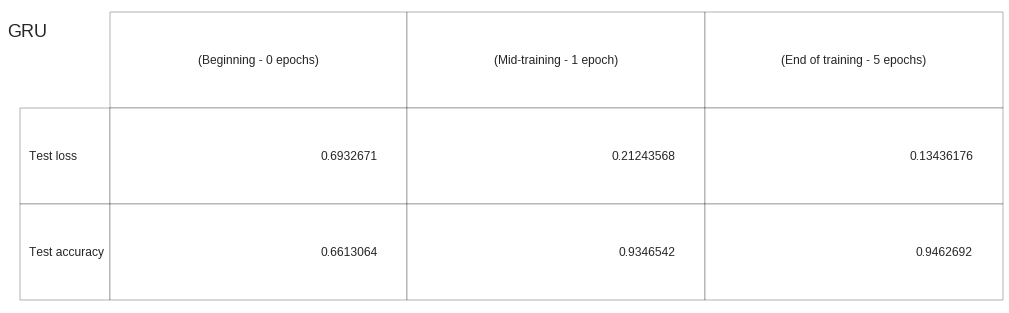

In [0]:
plot_summary_table(table_dict_test)

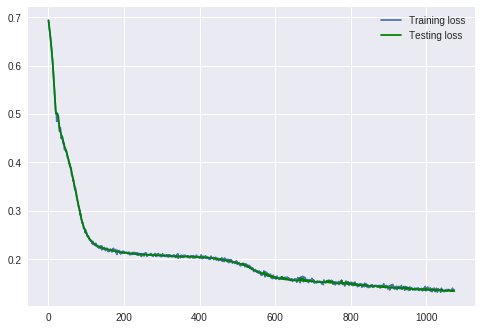

In [0]:
## Learning curves
plt.figure()
plt.plot(training_curve)
plt.plot(test_curve, 'g')
plt.legend(['Training loss', 'Testing loss'])

# Pixel prediction

# Model formula

For this case we have a sequence of 784 pixels $x_{1},x_{2},...x_{m},...x_{784}$ where the pixel $x_{m}$ has been cropped from the image. Our objective is to use the model tu generate most probable value for the missing pixel. In this case the pixel can take only the value 0 or 1. Using the LSTM model the pixel $p(x_{t+1})$ is dependent of the previous pixels. So in this case the model we have to obtain the probability would be the following : $p(x) = \prod_{t=1}^{t}p(x_{t}|x_{1},x_{2},...x_{t-1}) \prod_{t=t}^{784} p(x_{t}|x_{t-1},x_{t-2},...x_{1})$ the LSTM network will learn this model so we can get the probabilty for every possibility of the value of the pixel and then take the one that is most probable given the sequence we have. We can extend the model to the case with 2x2 patch and in order to get the most probabe pixel we will have to try all the $2^{n}$ combinations.

### Generate a small in-painting dataset.
Sample $100$ images from your test set. Mask/Remove the last $300$ pixels (roughly 10 rows and a half).

In [0]:
#Sample 100 images + mask 
images,_ = eval_mnist.test.next_batch(100)
bin_images = binarize(images)
input_images = np.copy(bin_images)
input_images.shape

### Predict missing parts and compare with the ground truth. 
Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).

In [29]:
!git clone https://github.com/ELTono/DL4.git
im_model_0 = np.load('DL4/images_model_0.npy')
im_model_1 = np.load('DL4/images_model_1.npy')
im_model_5 = np.load('DL4/images_model_5.npy')
real_images = np.load('DL4/real_images.npy')

Cloning into 'DL4'...
remote: Counting objects: 20, done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [0]:
def image_creation(model,n_samples,input_images):
  images_list = []
  with tf.Session() as sess:
    path = "DL4/my_model"+str(model)+".chkp"
    saver.restore(sess,path)
    for i in range(n_samples):
      for pixel in range(485,785):
        predict_dict = {x:input_images[:,:-1],h_range:[pixel-2,pixel-1]}
        input_images[:,pixel-1] = sess.run(sample_pixel,feed_dict = predict_dict )
      images_list.append(np.copy(input_images))
  return images_list

In [0]:
def model_loss(model,images,label):
  
  n_samples = len(images)
  model_ep = np.zeros((n_samples,4))
  with tf.Session() as sess:
    path = "DL4/my_model"+str(model)+".chkp"
    saver.restore(sess,path)
    z = 0
    for j in images:
      cross_dict = {x:j[:,:783],y:label[:,1:]}
      loss_array = sess.run([pixel_1,pixel_10,pixel_28,pixel_300],feed_dict = cross_dict)
      model_ep[z,:] = loss_array
      z+=1
      average_entropy = np.mean(model_ep,axis = 0)
    return average_entropy    

In [0]:
# Creations of images
im_model_0 = image_creation(0,10,input_images)
im_model_1 = image_creation(1,10,input_images)
im_model_5 = image_creation(5,10,input_images)

In [46]:
# Calc of the different cross entropy by model
entropy_model_0 = model_loss(0,im_model_0,real_images)
entropy_model_1 = model_loss(1,im_model_1,real_images)
entropy_model_5 = model_loss(5,im_model_5,real_images)

INFO:tensorflow:Restoring parameters from DL4/my_model0.chkp
INFO:tensorflow:Restoring parameters from DL4/my_model1.chkp
INFO:tensorflow:Restoring parameters from DL4/my_model5.chkp


In [47]:
# We print the resume table
print(entropy_model_0)
print(entropy_model_1)
print(entropy_model_5)

[0.69518907 0.69031171 0.73068407 0.74569246]
[0.73370627 1.34811029 0.9202821  0.75079654]
[0.64294744 0.77469825 0.49969343 0.78157297]


In [0]:
with tf.Session() as sess:
  path = "DL4/my_model"+str(1)+".chkp"
  saver.restore(sess,path)
  cross_dict = {x:j[:,:783],y:j[:,1:]}
  loss = sess.run(pixel_28,feed_dict = cross_dict)

print(loss)
  

INFO:tensorflow:Restoring parameters from /content/my_model1.chkp
0.4105565


### Predict missing parts and compare with the ground truth. 
Given the above generated partial sequences as input to your train models, generate the continuation of these masked images (for the next 1, 10, 28, 300 pixels).

#### Visualize completing the image. 
Pick out $3$ examples from your in-painting dataset to visualize  the resulting images -- this can be done at random, but should include \textit{a successful example, failure example and one that displays high variance between samples.}

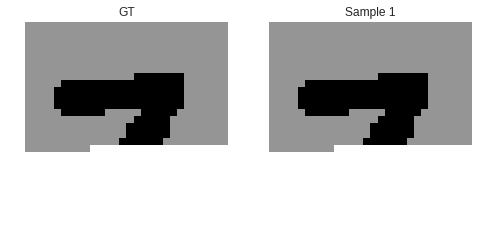

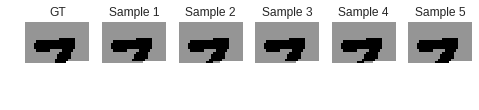

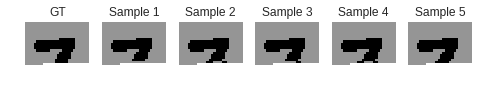

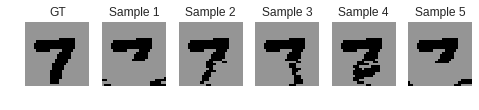

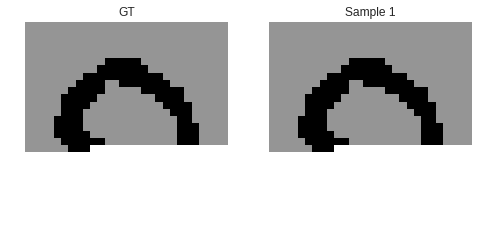

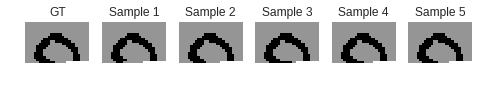

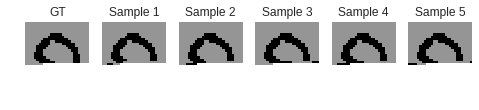

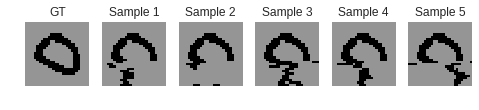

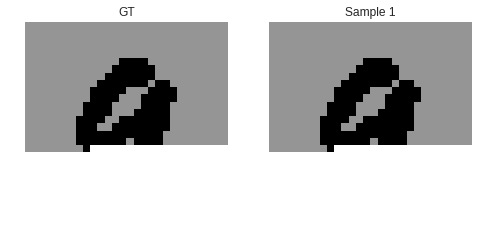

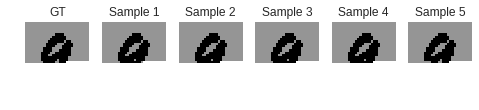

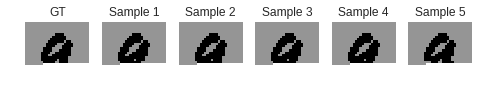

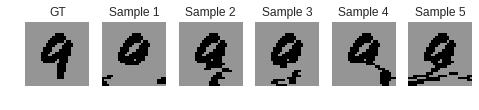

In [50]:
#Visualize samples
images = [18,0,1]
#images = [i for i in range(0,10)]
pixel_selection = [1,10,28,300]
sample_selection = [1,5,5,5]
for i in images:
  #print("image #{}".format(i))
  for(pixels,samples) in zip (pixel_selection,sample_selection): #We select the number of pixels we want to predict
    #print("Predicting {} pixels".format(pixels))
    pixels_remove = 300 - pixels
    plt.figure()
    plt.subplot(1,samples+1,1)
    gt = np.copy(real_images[i,:])
    if pixels_remove:
      gt[-pixels_remove:] = None
    plt.imshow(np.reshape(gt,(28,28)),interpolation = "None",vmin = -1, vmax = 1)
    plt.title("GT")
    plt.axis("off")
    for sample in range(samples):
      plt.subplot(1,samples+1,sample+2)
      im = np.copy(im_model_5[sample][i])
      if pixels_remove:
        im[-pixels_remove:] = None
      plt.imshow(np.reshape(im,(28,28)),interpolation = "None", vmin = -1, vmax = 1)
      plt.title("Sample {}".format(sample+1))
      plt.axis("off")
    plt.show

# In-painting Task

### In-painting data 

We provide two datasets (one corresponing to the one-pixel in-painting tasks and the other one with a 2x2 patch missing). The datasets are available on [git](https://github.com/dianaborsa/compgi22_dl_cw4/blob/master/). Links are available in the description and code is provide below to load the dataset and visualize. Both datasets have 1000 sampled images from MNIST(test). Both dataset sets have the same simple structure: cropped images and their ground truth (GT). in this second task, you will consider the copped images and use your pixel-to-pixel model, try to predict the missing pixel/patches.


In [51]:
# Downloading the inpainting datasets
!git clone https://github.com/dianaborsa/compgi22_dl_cw4.git

Cloning into 'compgi22_dl_cw4'...
remote: Counting objects: 16, done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 6), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [0]:
# Load the dataset (2X2)
dataset_1x1 = np.load('compgi22_dl_cw4/one_pixel_inpainting.npy')
dataset_2x2 = np.load('compgi22_dl_cw4/2X2_pixels_inpainting.npy')

Loaded dataset has 1000 samples: cropped + GT


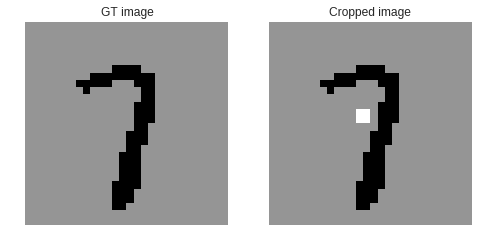

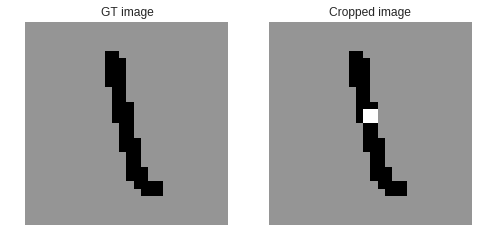

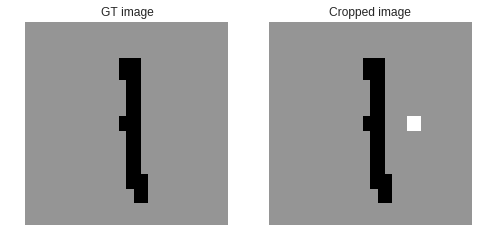

In [53]:
# checking loading
images    = dataset_2x2[0]
gt_images = dataset_2x2[1] 

nSamples, ndim = gt_images.shape
print('Loaded dataset has {} samples: cropped + GT'.format(nSamples))

# randomly visualize a few samples
for SampleID in np.random.randint(nSamples,size=3):
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(np.reshape(gt_images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("GT image")
  plt.grid(False)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(np.reshape(images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Cropped image")
  plt.grid(False)
  plt.axis('off')

### One-pixel prediction 

In [54]:
# Predicting the missing pixel
images_1p = dataset_1x1[0]
gt_1p = dataset_1x1[1]
index = np.argwhere(images_1p == -1) # We identify the index to change
print(index)
images_1p_0 = np.copy(images_1p) # We create a copy
images_1p_1 = np.copy(images_1p) # We create a copy
image_1p_replace = np.copy(images_1p)

images_1p_0[images_1p_0 == -1] = 0
images_1p_1[images_1p_0 == -1] = 1

[[  0 404]
 [  1 294]
 [  2 433]
 ...
 [997 548]
 [998 402]
 [999 432]]


In [55]:
with tf.Session() as sess:
  saver.restore(sess,'DL4/my_model5.chkp')
  predict_dict_0 = {x:images_1p_0[:,:-1],y:gt_1p[:,1:]}
  cross_0 = sess.run(cross_entropy_image,feed_dict = predict_dict_0)
  
  predict_dict_1 = {x:images_1p_1[:,:-1],y:gt_1p[:,1:]}
  cross_1 = sess.run(cross_entropy_image,feed_dict = predict_dict_1)

INFO:tensorflow:Restoring parameters from DL4/my_model5.chkp


In [0]:
cross_1p = np.column_stack((cross_0,cross_1),)
selection_1p = np.argmin(cross_1p,axis = 1)
image_1p_replace[index[:,0],index[:,1]] = selection_1p

In [66]:
print(image_1p_replace.shape)

(1000, 784)


In [67]:
with tf.Session() as sess:
  saver.restore(sess,'DL4/my_model5.chkp')
  predict_dict_0 = {x:image_1p_replace[0:1,:-1],y:gt_1p[0:1,1:]}
  loss = sess.run(cross_entropy,feed_dict = predict_dict_0)
print(loss)

INFO:tensorflow:Restoring parameters from DL4/my_model5.chkp
0.14941838


Loaded dataset has 1000 samples: cropped + GT
0
776
373


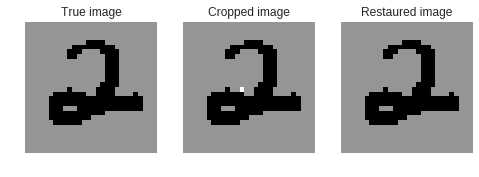

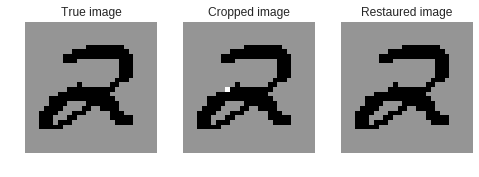

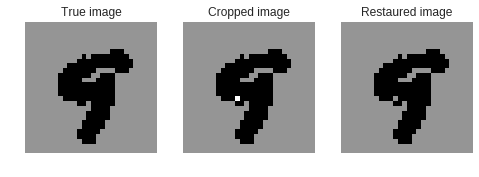

In [62]:
## Visualization of 1 pixel missing images and theirs corrections.
nSamples, ndim = gt_1p.shape
print('Loaded dataset has {} samples: cropped + GT'.format(nSamples))

# randomly visualize a few samples
for SampleID in np.random.randint(nSamples,size=3):
  plt.figure()
  
  print(SampleID)
  plt.subplot(1,3,1)
  plt.imshow(np.reshape(gt_1p[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("True image")
  plt.grid(False)
  plt.axis('off')
  
  plt.subplot(1,3,2)
  plt.imshow(np.reshape(images_1p[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Cropped image")
  plt.grid(False)
  plt.axis('off')
  
  plt.subplot(1,3,3)
  plt.imshow(np.reshape(image_1p_replace[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Restaured image")
  plt.grid(False)
  plt.axis('off')
  
  

### Two-by-two patch prediction 

In [0]:
# Predicting the missing patch
images    = dataset_2x2[0]
gt_images = dataset_2x2[1] 
corrected_images = np.reshape(np.copy(images),(-1))
index_2x2 = np.argwhere(corrected_images == -1)
index_2x2 = np.reshape(index_2x2,(-1)) # Index has shape 4,000

combination_list = [(i,j,k,l) for i in range(2) for j in range(2) for k in range(2) for l in range(2)]
cross_list = []
# Visualize samples

In [70]:
with tf.Session() as sess:
  saver.restore(sess,'DL4/my_model5.chkp')
  for comb in combination_list:
    images_replace = np.copy(images)
    re_images = np.reshape(images_replace,(-1)) # Now it has shape (784,000,)
    re_images[index_2x2] = np.tile(comb,1000) # We change all the values of -1 to the new combinations
    final_image = np.reshape(re_images,(1000,-1))
    
    val_dict = {x:final_image[:,:-1],y:gt_1p[:,1:]}
    cross = sess.run(cross_entropy_image,feed_dict = val_dict)
    cross_list.append(cross)

INFO:tensorflow:Restoring parameters from DL4/my_model5.chkp


In [0]:
cross_table = np.transpose(np.array(cross_list))
selection_2x2 = np.argmin(cross_table,axis = 1)
corrected_pixels = [combination_list[i] for i in selection_2x2]

In [76]:
## We convert the list of arrays in a single list
corrected_list = []
for j in corrected_pixels:
  for i in j:
    corrected_list.append(i)
print(corrected_list)

[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 

In [0]:
corrected_images[index_2x2] = corrected_list
final_corrected_image = np.reshape(corrected_images,(1000,-1))

Loaded dataset has 1000 samples: cropped + GT
300
629
198


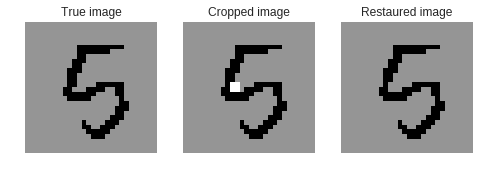

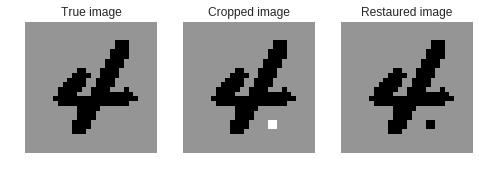

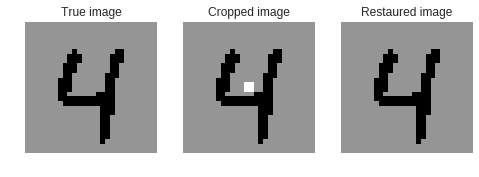

In [78]:
#Visualising 2x2 missing patches and theirs corrections
nSamples, ndim = gt_images.shape
print('Loaded dataset has {} samples: cropped + GT'.format(nSamples))

# randomly visualize a few samples
for SampleID in np.random.randint(nSamples,size=3):
  
  print(SampleID)
  plt.figure()
  plt.subplot(1,3,1)
  plt.imshow(np.reshape(gt_images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("True image")
  plt.grid(False)
  plt.axis('off')
  
  plt.subplot(1,3,2)
  plt.imshow(np.reshape(images[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Cropped image")
  plt.grid(False)
  plt.axis('off')
  
  plt.subplot(1,3,3)
  plt.imshow(np.reshape(final_corrected_image[SampleID],(28,28)), interpolation='None',vmin=-1, vmax=1)
  plt.title("Restaured image")
  plt.grid(False)
  plt.axis('off')

In [80]:
with tf.Session() as sess:
  saver.restore(sess,'DL4/my_model5.chkp')
  predict_dict_0 = {x:final_corrected_image[300:301,:-1],y:gt_1p[300:301,1:]}
  loss = sess.run(cross_entropy,feed_dict = predict_dict_0)
print(loss)

INFO:tensorflow:Restoring parameters from DL4/my_model5.chkp
0.6196918


----------------------------------------------------------------------

## PART 2: Learning multiple tasks with LSTM-s (40 pts)
(Credits to Pedro Ortega for insipring the task and insights behind it)

### Task Description

Consider the following generative model: 
* We have $3$ symbols that will be generates from a multinomial/categorical distribution, with parameters $\textbf{p}=(p_1, p_2, p_3)$: symbol 1 is generated with probability $p_1$, symbol 2 is generated with probability $p_2$, symbol 3 with probability $p_3$. 
$$X \sim Categorical(3, \textbf{p})$$

* The parameter vector $\textbf{p}$ is drawn from a Dirichlet prior: $$\textbf{p} \sim Dirichlet(\alpha)$$

We are going to use the above to generate sequences (a continuous stream of data/observations), in the following way:
* Step 1: We sample $\textbf{p}$ from the prior
* Step 2: Given this $\textbf{p}$, for $T-1$ time-steps we will generate i.i.d observations by sampling one of the $3$ symbols from the categorical distribution induced by $\textbf{p}$
$$ (X_1, X_2, \cdots X_{T-1}) , s.t. X_i \sim Categorical(3, \textbf{p})$$
* Step 3: At the end of the sequence we append a fourth symbol (RESET): $(X_1, X_2, \cdots X_T, RESET)$
* Step 4: Return to Step 1 and resample $\textbf{p}$. 
* Repeat this 'forever'.

This will give rise to a continuous stream of data, of the form: $ x_1, x_2, \cdots x_{T-1}, RESET, x_{T+1}, x_{T+2}, \cdots x_{2T}, RESET, \cdots, x_{kT+1}, x_{kT+2}, \cdots x_{(k+1)T}, RESET, \cdots$.

Note: Data generation is provided for you in the cell below. (You just need to call the minibatch function to get a sequence of this form).

### Model

We are going to consider an simple LSTM (32 units hidden state) and present this (generated) sequence of data as an input. Similar to the pixel-to-pixel model, at each time step the LSTM will receive one bit of information (gets to observe the symbol recorded at this time step) and need to output the probability distribution for the next symbol. Thus, at time $t$ the LSTM get as input the symbol $x_t$ and will return a probability over the next state $P(x_{t+1}| x_{t}, LSTM_{t-1})$.

### Questions

1) **Without running any experiments (5 pts)**, try to think about the following scenarios and answer these questions: 
* Consider we generate the data with $Dirichlet(\alpha)$, where $\alpha = (10.,1.,1.)$. What do you think the LSTM model will learn, if anything? Remember we are effectively changing the prediction task, every time we are resampling the probability vector $\textbf{p}$. * Hint: Think about the distribution over $\textbf{p}$ that this prior induces. *  

* What if we consider a more uniformative prior, like $\alpha=(1.1, 1.1, 1.1)$?  

* How does this (learning ability and generalization) depend on the lenght of the tasks $T$ and the unrolling length on the LSTM? It might be helpful to consider the two extremes: 
i) $T=1$ (we reset the task at every time step). What should the model learn in this case?, ii) $T=\infty$ (we sample the task once and keep it forever). What should the model learn in this case? (Answer this for both previous priors)


* Does this increase or descrease the complexity of the prediction problem? What about the ability to generalize to unseen $\textbf{p}$?

2) **Time to check your intuitions (10 pts)** 

Implement a similar LSTM model as in PART 1. This will take as input a one-hot description of the obsevation ($[1,0,0,0]$ for symbol 1. $[0,1,0,0]$ for symbol 2, $[0,0,1,0]$ for symbol 3, $[0,0,0,1]$ for the RESET symbol). This input is fed into a 32-unit LSTM and LSTM output is processed as before: $\textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}$ . The model will be trained, as before, by cross-entropy on predicting the next symbol. You will notice that the setup is really similar to the previous tasks, so feel free to re-use whenever appropiate.

Train the following models:
* T = 5, and T=20 with the data generated from a Dirichlet with $\alpha = (10.,1.,1.)$. Unrolling length for the LSTM = 100. Minibatch size = 64. (M1, M2)
* T = 5, and T=20 with the data generated from a Dirichlet with$\alpha = (1.3, 1.3, 1.3)$ Unrolling length for the LSTM = 100. Minibatch size = 64. (M3, M4)

Train the models for $1000$ iterations ($1000$ minibatches). Record the training and testing preformance (every 10-20 iterations). Plot the curves over training time. What do you observe? (Is this curve smooth? Do any of them plateau?). **[2x5 pts]**


3) **Analysis results (10 pts)**

In this section, we will investigate what the models have actaully learnt. For this we will generate a few test sequences:
* *Test sequence 1*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (10.,1.,1.)$.
* *Test sequence 2*: generate a test sequence that changes tasks every T=5 steps from a a Dirichlet with $\alpha = (1.3,1.3,1.3)$.
* *Test sequence 3*: generate a test sequence that 'changes tasks' every T=5 steps, but keep sampling according to the same probability vector $\textbf{p}=(1,0,0)$ (You can use any of the extreme here).

i) Test the preformance of M1 and M3 and these test sequences. In addition plot the actual prediction the models do (probability of symbols over time). This should give you more insight in what the model does. Does this correspond or contradict your previous intuitions? **[5 pts]**

ii) Repeat the same procedure for task length $T=20$ and models M2 and M4. What do you observe? How do M2 and M4 compare to each other and how to their compare to M1 and M3 (the models trained on the shorter task length). **[5 pts]**

4) **Comparison to the Bayesian update (15 pts)**

Going back to the generative process in the task description. For a given prior, for each the mini-tasks (selecting/sampling a $\textbf{p}$), one could compute the Bayesian posterior at each time step.  We start with a prior and every time we observe a symbol with update our posterior over the parameters
 $\textbf{p}$ given the data. We do this every time step, till we reach the RESET symbol which marks the end of the task. Then we start again, from the prior.

i) Derive the posterior update for each time step. (Hint: since the two distribution are conjugates or each other, the posterior has a closed form). **[3 pts]**

ii) Implement this posterior update and use it to infer the probabilities over the next symbol, for the previously generated test sequences. This will tell you, what the inferred probabilities would be, if we knew the structure of the model, the prior and that the reset symbol means the tasks has finished and we should reset our estimate to the prior. (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors) **[5 pts]**

iii) Compare this to what the LSTM predictions are. What do you observe? What are the failure cases -- can you explain why this might happen? (For test sequence 1 and 2, use the prior that generated them, for test sequence 3 compute the updates starting from both priors). **[7 pts]**
 
For this analysis, only consider $T=20$ and respectively models M2 and M4.

5) **Play (not for credit, just for fun)**

Visualize the hidden state of the LSTM. Look at the eigenvalues: How many of these are actual revelant? What do they correspond to?




## Q1

a)This dirchlet distribution with these alphas values would produce really high probabilities for the symbol 1, which means it would almost always sample a symbol 1 with the exception of the RESET symbol. This will cause an imbalanec class problem and as a consequence the model would only learn to predict always the symbol 1 given this would appear almost every time in the series. Also they should be able to learn to predict the RESET probability as P=0 in the task and P=1 for every RESET step.

b) This uniform prior would make the dirichlet distribution produce more and less uniform probabilities for every symbol, which means the sequence produced would be very similar to a random sequence. This would cause that the LSTM model learn basically randomness from the model, so given an input the model will basically guess the next symbol. Again in theory the model should be able to learn the probability of the RESET symbol as in the case before.

c) For the case of T=1, the sequence would be repeated at every time step so we would have a new sampling probability everytime. In the case of the first prior (10,1,1), this still would produce high probabilities for the symbol 1, but because now it would be based in a infinite number of sampling, the model would learn better to produce probabilities like the prior distribution given it has more sampling from where to learn. This would happen equally for the uniform prior, the model would obtain more sample probabilities and would be able to learn the probabilities from the dirichlet distribution.

For the case of T=inifinite, this mean the sequence will only take one sample of probabilities. This will cause the model to be very biased given it would learn based only in one sample that occurs. For example if in the first prior we obtain a odd sample with even probabilities, the model would learn this as the real distribution ignoring the fact its only one sample. The same would occur for the second prior.

d)The length of the task increase the complexity of the model, given you obtain less sample from where to learn. Increasing the unrolling lenght of the RNN help to have more stable probabilities given the model process a longer sequence with the same characteristics.

In [0]:
#@title Generate data function

n_symbols = 3
def get_data_per_task(number_samples_per_task=10, p=None, alpha=None):
  if p == None:
    # sample task
    if alpha == None:
      p = np.random.dirichlet((1.3, 1.3, 1.3), 1)[0]
    else:
      p = np.random.dirichlet(alpha, 1)[0]
    
  p = np.append(p, [0])
  sample = np.random.multinomial(1, p, size = number_samples_per_task)
  
  sample = np.append(sample,[[0,0,0,1]], axis=0)
  return sample
  

def get_data(ntasks, nsamples_per_task, p=None, alpha=None):
  sample = []
  for task_id in range(ntasks):
    sample.append(get_data_per_task(number_samples_per_task = nsamples_per_task, p=p, alpha=alpha))
  return np.concatenate(sample)


def get_minibatch(batch_size, ntasks, nsamples_per_task, p=None, alpha=None):
  sample = get_data(batch_size*ntasks, nsamples_per_task, p=p, alpha=alpha)
  return np.reshape(sample, [batch_size, ntasks*(nsamples_per_task+1), n_symbols+1])
  

### Training your recurrent model

In [3]:
## We create the training sets
M1 = get_minibatch(64000,20,4,alpha = [10.,1.,1.])
M2 = get_minibatch(64000,5,19,alpha = [10.,1.,1.])
M3 = get_minibatch(64000,20,4)
M4 = get_minibatch(64000,5,19)
print(M2.shape)
print(M3.shape)
print(M4.shape)

## We create test data
M1_test = get_minibatch(10000,20,4,alpha = [10.,1.,1.])
M2_test = get_minibatch(10000,5,19,alpha = [10.,1.,1.])
M3_test = get_minibatch(10000,20,4)
M4_test = get_minibatch(10000,5,19)

(64000, 100, 4)
(64000, 100, 4)
(64000, 100, 4)


In [0]:
## Model parameters
l_rate = 0.001
n_iterations = 1000
batch_size = 64
n_units = 32
dense_units = 64

In [0]:
# We create the dictionary to save the information of all models and list with the different datasets
model_dict = {"M1":{"train_acc":[],"train_loss":[],"test_acc":[],"test_loss":[]},
                "M2":{"train_acc":[],"train_loss":[],"test_acc":[],"test_loss":[]},
                "M3":{"train_acc":[],"train_loss":[],"test_acc":[],"test_loss":[]},
                "M4":{"train_acc":[],"train_loss":[],"test_acc":[],"test_loss":[]}}

data_list = [("M1",M1,M1_test),("M2",M2,M2_test),("M3",M3,M3_test),("M4",M4,M4_test)]
Training = True

In [6]:
  ## We train the model for the different data sets and models.
  for (model,data,data_test) in data_list:
    # Advisable to you GPU for this part
    with tf.device('/device:GPU:*'):
  
      tf.reset_default_graph()
    # your model here.... 
      x = tf.placeholder(tf.float32, [None, 99,4])
      y = tf.placeholder(tf.float32, [None, 99,4])
  
    # We set the model 
      y_label = tf.reshape(y,[-1,4])
  
      rnn_model = tf.contrib.rnn.LSTMCell(n_units)
      outputs, state= tf.nn.dynamic_rnn(rnn_model, x, dtype=tf.float32)
      rnn_output = tf.reshape(outputs,[-1,n_units]) # Size: [batch*time step,n_units], this is so we can pass all the batchs and apply them the dense layers
      h_relu = tf.nn.relu(rnn_output)
      h1 = tf.layers.dense(inputs = h_relu,units = dense_units, activation = tf.nn.relu)
      out = tf.layers.dense(inputs = h1,units = 4)
      probs = tf.nn.softmax(out,1)
 
    # We set the error, trainer step and accuracy
      cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_label, logits=out))
 
      train_step = tf.train.AdamOptimizer(learning_rate=l_rate).minimize(cross_entropy)
  
      correct_prediction = tf.equal(tf.argmax(y_label,1), tf.argmax(out, 1))
      correct_prediction = tf.cast(correct_prediction, tf.float32)
      accuracy = tf.reduce_mean(correct_prediction)    
      saver = tf.train.Saver()  
  ################# Training of the model ########################
      with tf.Session() as sess: 
        sess.run(tf.global_variables_initializer())
  
        if Training:
          for i in range(n_iterations):
            batch_sequence = data[64*i:64*(i+1),:,:] # We generate the 64 size minibatch
            batch_x = batch_sequence[:,:-1,:] # We generate the x eliminating the last entry
            batch_y = batch_sequence[:,1:,:] # We generate the y eliminating the last entry
    
          # Actual training
            sess.run(train_step,feed_dict={x:batch_x, y:batch_y})
      
            if np.mod(i+1,20) == 0:
              train_accuracy,train_loss = sess.run([accuracy,cross_entropy],feed_dict = {x:batch_x,y:batch_y})
              model_dict[str(model)]["train_acc"].append(train_accuracy)
              model_dict[str(model)]["train_loss"].append(train_loss)
              
              testing_accuracy,testing_loss = sess.run([accuracy,cross_entropy],feed_dict = {x:data_test[:,:-1,:],y:data_test[:,1:,:]})
              model_dict[str(model)]["test_acc"].append(testing_accuracy)
              model_dict[str(model)]["test_loss"].append(testing_loss)
              
      
          #if np.mod(i+1,20) == 0:
          # testing_accuracy = sess.run(accuracy,feed_dict = {x:M1_test[:,:-1,:],y:M1_test[:,1:,:]})
          # test_accuracy.append(testing_accuracy)
          path = "/content/"+str(model)+"_model.chkp"
          print(path)
          saver.save(sess,path)
          

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

/content/M1_model.chkp
/content/M2_model.chkp
/content/M3_model.chkp
/content/M4_model.chkp


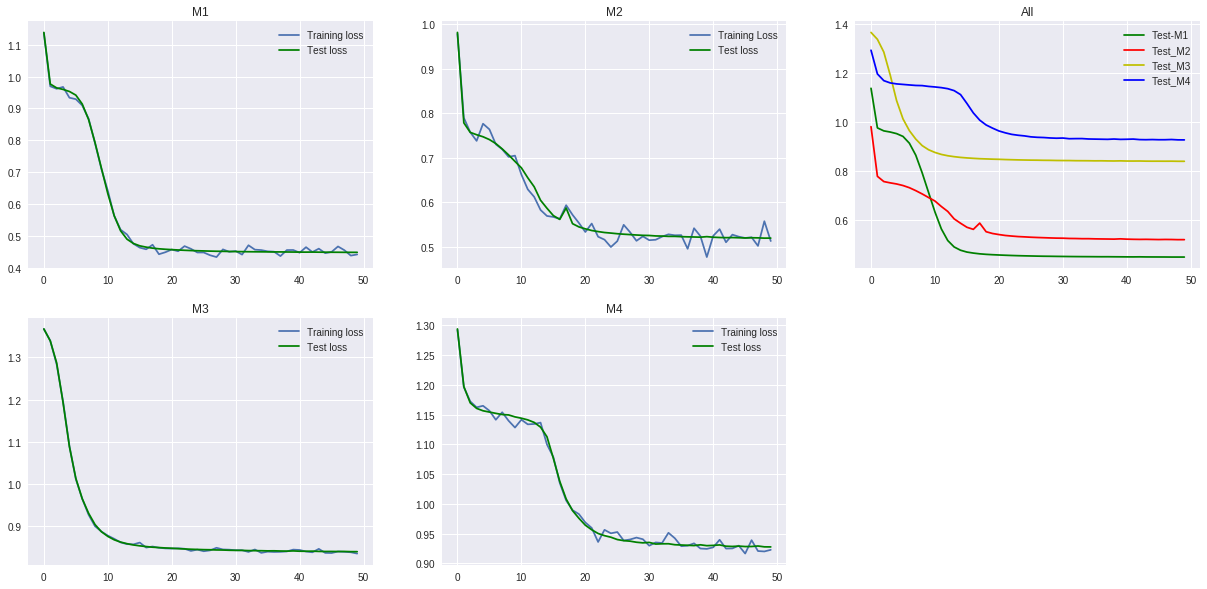

In [28]:
## Plotting learning curves
train_parameter = "train_loss"
test_paremeter = "test_loss"
ncols = 3
nrows = 2
_, axes = plt.subplots(nrows, ncols, figsize=(ncols* 7, nrows * 5))
# plot one sample over time

axes[0, 0].plot(model_dict["M1"][train_parameter])
axes[0, 0].plot(model_dict["M1"][test_paremeter],'g')
axes[0, 0].set_title("M1")
axes[0, 0].legend(['Training loss', 'Test loss'])

axes[0, 1].plot(model_dict["M2"][train_parameter])
axes[0, 1].plot(model_dict["M2"][test_paremeter],'g')
axes[0, 1].set_title("M2")
axes[0, 1].legend(['Training Loss', 'Test loss'])

axes[1, 0].plot(model_dict["M3"][train_parameter])
axes[1, 0].plot(model_dict["M3"][test_paremeter],'g')
axes[1, 0].set_title("M3")
axes[1, 0].legend(['Training loss', 'Test loss'])


axes[1, 1].plot(model_dict["M4"][train_parameter])
axes[1, 1].plot(model_dict["M4"][test_paremeter],'g')
axes[1, 1].set_title("M4")
axes[1, 1].legend(['Training loss', 'Test loss'])

axes[0, 2].plot(model_dict["M1"][test_paremeter],'g')
axes[0, 2].plot(model_dict["M2"][test_paremeter],'r')
axes[0, 2].plot(model_dict["M3"][test_paremeter],'y')
axes[0, 2].plot(model_dict["M4"][test_paremeter],'b')
axes[0, 2].legend(['Test-M1', 'Test_M2','Test_M3','Test_M4'])
axes[0, 2].set_title("All")
axes[1, 2].set_frame_on(False)
axes[1, 2].get_yaxis().set_visible(False)
axes[1, 2].get_xaxis().set_visible(False)

## Q2
In genera all the test loss curves are smooth. The training curves for model M4 and M2 have some bumps given they reset every time step and have a uniform prior, which causes the model to predict some result as random. The other 2 models because they were trained with the prior (10,1,1), they produce smoother curves given the prediction is almost always symbol 1. M1,M3,M4 plateu while M2 appears that after 1000 iterations it can still learn more.

### Analysing your recurrent model

In [0]:
# Sample generation of test sequence:
# T = 5
test_1_5 = get_minibatch(10000,20,4,alpha = [10.,1.,1.])
test_2_5 = get_minibatch(10000,20,4,alpha = [1.3,1.3,1.3])
test_3_5 = get_minibatch(10000,20,4,p = [1.0, 0.0, 0.0])

# T = 20
test_1_20 = get_minibatch(10000,5,19,alpha = [10.,1.,1.])
test_2_20 = get_minibatch(10000,5,19,alpha = [1.3,1.3,1.3])
test_3_20 = get_minibatch(10000,5,19,p = [1.0, 0.0, 0.0])

In [0]:
# We define the dict to store the loss and acc
model_test_dict = {"M1":[],"M2":[],"M3":[],"M4":[]}
prob_test_dict = {"M1":[],"M2":[],"M3":[],"M4":[]}

In [10]:
for i in [1,3]:
  for j in [test_1_5,test_2_5,test_3_5]:
    with tf.Session() as sess:
      path = "/content/M"+str(i)+"_model.chkp"
      saver.restore(sess,path)
      loss,acc = sess.run([cross_entropy,accuracy],feed_dict = {x:j[:,:-1,:],y:j[:,1:,:]})
      model_test_dict["M"+str(i)].append((loss,acc))
      
      prob_table = sess.run(probs,feed_dict = {x:j[0:1,:-1,:],y:j[0:1,1:,:]})
      prob_test_dict["M"+str(i)].append(prob_table)
      

INFO:tensorflow:Restoring parameters from /content/M1_model.chkp
INFO:tensorflow:Restoring parameters from /content/M1_model.chkp
INFO:tensorflow:Restoring parameters from /content/M1_model.chkp
INFO:tensorflow:Restoring parameters from /content/M3_model.chkp
INFO:tensorflow:Restoring parameters from /content/M3_model.chkp
INFO:tensorflow:Restoring parameters from /content/M3_model.chkp


In [11]:
for i in [2,4]:
  for j in [test_1_20,test_2_20,test_3_20]:
    with tf.Session() as sess:
      path = "/content/M"+str(i)+"_model.chkp"
      saver.restore(sess,path)
      loss,acc = sess.run([cross_entropy,accuracy],feed_dict = {x:j[:,:-1,:],y:j[:,1:,:]})
      model_test_dict["M"+str(i)].append((loss,acc))
      
      prob_table = sess.run(probs,feed_dict = {x:j[0:1,:-1,:],y:j[0:1,1:,:]})
      prob_test_dict["M"+str(i)].append(prob_table)

INFO:tensorflow:Restoring parameters from /content/M2_model.chkp
INFO:tensorflow:Restoring parameters from /content/M2_model.chkp
INFO:tensorflow:Restoring parameters from /content/M2_model.chkp
INFO:tensorflow:Restoring parameters from /content/M4_model.chkp
INFO:tensorflow:Restoring parameters from /content/M4_model.chkp
INFO:tensorflow:Restoring parameters from /content/M4_model.chkp


In [12]:
## We print the loss and acc of every test we ran
print(model_test_dict["M1"])
print(model_test_dict["M2"])
print(model_test_dict["M3"])
print(model_test_dict["M4"])

[(0.4471476, 0.8675454), (1.2236818, 0.4678101), (0.13009307, 1.0)]
[(0.51735437, 0.8422353), (1.240808, 0.37032726), (0.10091644, 1.0)]
[(0.7120261, 0.797301), (0.8405205, 0.5559313), (0.5887503, 0.989899)]
[(0.6413386, 0.8132121), (0.92647004, 0.5461424), (0.35738066, 1.0)]


Text(0.5,1,u'M3 sequence 3')

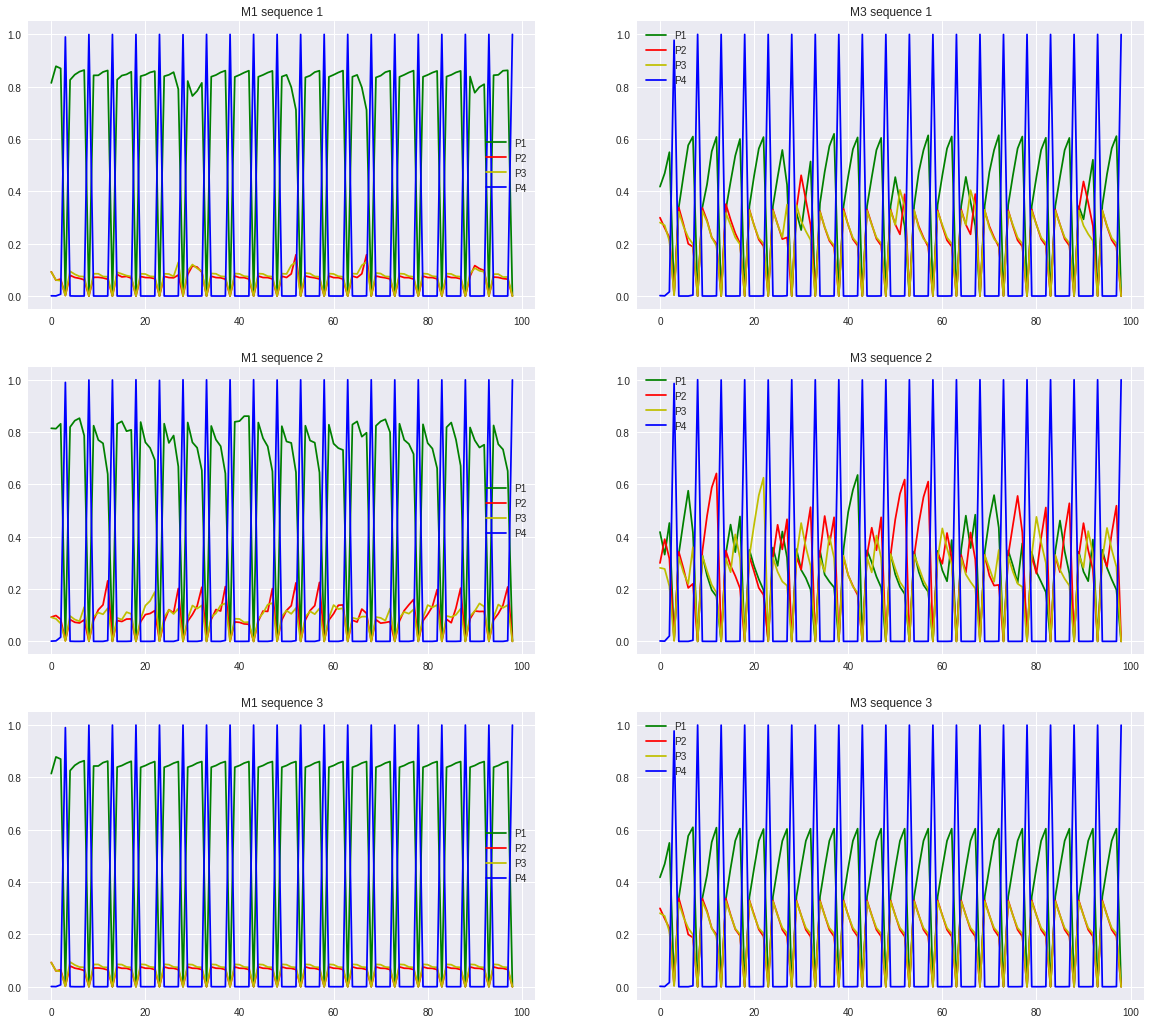

In [13]:
## We plot the probability of one batch
#print(prob_test_dict["M4"][0].shape)
#print(np.sum(prob_test_dict["M1"][0][1,:]))
## Plotting learning curves
## Plotting learning curves
ncols = 2
nrows = 3
_, axes = plt.subplots(nrows, ncols, figsize=(ncols* 10, nrows * 6))
# plot one sample over time

axes[0, 0].plot(np.transpose(prob_test_dict["M1"][0])[0],'g')
axes[0, 0].plot(np.transpose(prob_test_dict["M1"][0])[1],'r')
axes[0, 0].plot(np.transpose(prob_test_dict["M1"][0])[2],'y')
axes[0, 0].plot(np.transpose(prob_test_dict["M1"][0])[3],'b')
axes[0, 0].legend(['P1', 'P2','P3','P4'])
axes[0, 0].set_title("M1 sequence 1")

axes[0, 1].plot(np.transpose(prob_test_dict["M3"][0])[0],'g')
axes[0, 1].plot(np.transpose(prob_test_dict["M3"][0])[1],'r')
axes[0, 1].plot(np.transpose(prob_test_dict["M3"][0])[2],'y')
axes[0, 1].plot(np.transpose(prob_test_dict["M3"][0])[3],'b')
axes[0, 1].legend(['P1', 'P2','P3','P4'])
axes[0, 1].set_title("M3 sequence 1")

axes[1, 0].plot(np.transpose(prob_test_dict["M1"][1])[0],'g')
axes[1, 0].plot(np.transpose(prob_test_dict["M1"][1])[1],'r')
axes[1, 0].plot(np.transpose(prob_test_dict["M1"][1])[2],'y')
axes[1, 0].plot(np.transpose(prob_test_dict["M1"][1])[3],'b')
axes[1, 0].legend(['P1', 'P2','P3','P4'])
axes[1, 0].set_title("M1 sequence 2")

axes[1, 1].plot(np.transpose(prob_test_dict["M3"][1])[0],'g')
axes[1, 1].plot(np.transpose(prob_test_dict["M3"][1])[1],'r')
axes[1, 1].plot(np.transpose(prob_test_dict["M3"][1])[2],'y')
axes[1, 1].plot(np.transpose(prob_test_dict["M3"][1])[3],'b')
axes[1, 1].legend(['P1', 'P2','P3','P4'])
axes[1, 1].set_title("M3 sequence 2")

axes[2, 0].plot(np.transpose(prob_test_dict["M1"][2])[0],'g')
axes[2, 0].plot(np.transpose(prob_test_dict["M1"][2])[1],'r')
axes[2, 0].plot(np.transpose(prob_test_dict["M1"][2])[2],'y')
axes[2, 0].plot(np.transpose(prob_test_dict["M1"][2])[3],'b')
axes[2, 0].legend(['P1', 'P2','P3','P4'])
axes[2, 0].set_title("M1 sequence 3")

axes[2, 1].plot(np.transpose(prob_test_dict["M3"][2])[0],'g')
axes[2, 1].plot(np.transpose(prob_test_dict["M3"][2])[1],'r')
axes[2, 1].plot(np.transpose(prob_test_dict["M3"][2])[2],'y')
axes[2, 1].plot(np.transpose(prob_test_dict["M3"][2])[3],'b')
axes[2, 1].legend(['P1', 'P2','P3','P4'])
axes[2, 1].set_title("M3 sequence 3")

Text(0.5,1,u'M4 sequence 3')

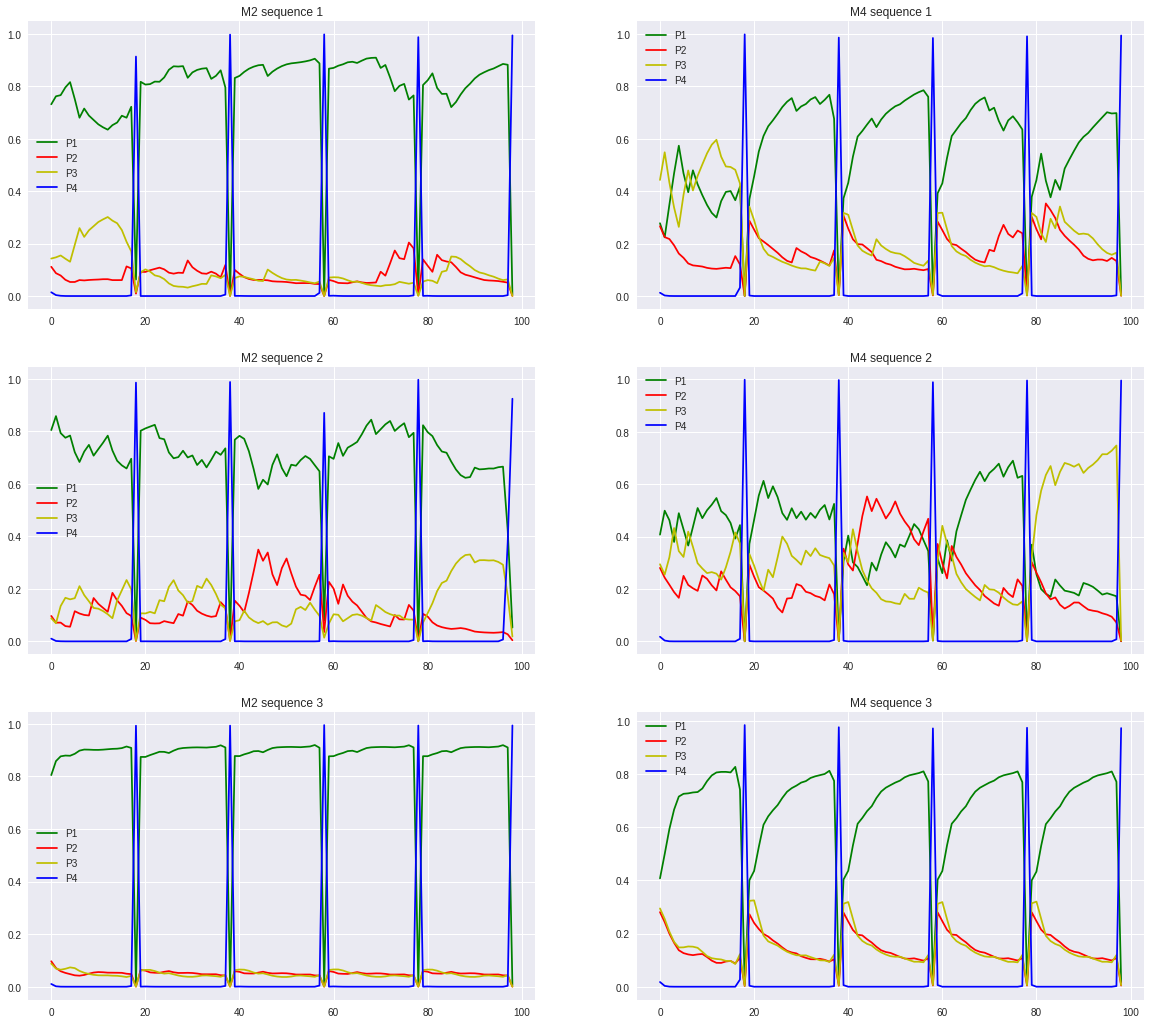

In [14]:
## We plot the probability of one batch
#print(prob_test_dict["M4"][0].shape)
#print(np.sum(prob_test_dict["M1"][0][1,:]))
## Plotting learning curves
## Plotting learning curves
ncols = 2
nrows = 3
_, axes = plt.subplots(nrows, ncols, figsize=(ncols* 10, nrows * 6))
# plot one sample over time

axes[0, 0].plot(np.transpose(prob_test_dict["M2"][0])[0],'g')
axes[0, 0].plot(np.transpose(prob_test_dict["M2"][0])[1],'r')
axes[0, 0].plot(np.transpose(prob_test_dict["M2"][0])[2],'y')
axes[0, 0].plot(np.transpose(prob_test_dict["M2"][0])[3],'b')
axes[0, 0].legend(['P1', 'P2','P3','P4'])
axes[0, 0].set_title("M2 sequence 1")

axes[0, 1].plot(np.transpose(prob_test_dict["M4"][0])[0],'g')
axes[0, 1].plot(np.transpose(prob_test_dict["M4"][0])[1],'r')
axes[0, 1].plot(np.transpose(prob_test_dict["M4"][0])[2],'y')
axes[0, 1].plot(np.transpose(prob_test_dict["M4"][0])[3],'b')
axes[0, 1].legend(['P1', 'P2','P3','P4'])
axes[0, 1].set_title("M4 sequence 1")

axes[1, 0].plot(np.transpose(prob_test_dict["M2"][1])[0],'g')
axes[1, 0].plot(np.transpose(prob_test_dict["M2"][1])[1],'r')
axes[1, 0].plot(np.transpose(prob_test_dict["M2"][1])[2],'y')
axes[1, 0].plot(np.transpose(prob_test_dict["M2"][1])[3],'b')
axes[1, 0].legend(['P1', 'P2','P3','P4'])
axes[1, 0].set_title("M2 sequence 2")

axes[1, 1].plot(np.transpose(prob_test_dict["M4"][1])[0],'g')
axes[1, 1].plot(np.transpose(prob_test_dict["M4"][1])[1],'r')
axes[1, 1].plot(np.transpose(prob_test_dict["M4"][1])[2],'y')
axes[1, 1].plot(np.transpose(prob_test_dict["M4"][1])[3],'b')
axes[1, 1].legend(['P1', 'P2','P3','P4'])
axes[1, 1].set_title("M4 sequence 2")

axes[2, 0].plot(np.transpose(prob_test_dict["M2"][2])[0],'g')
axes[2, 0].plot(np.transpose(prob_test_dict["M2"][2])[1],'r')
axes[2, 0].plot(np.transpose(prob_test_dict["M2"][2])[2],'y')
axes[2, 0].plot(np.transpose(prob_test_dict["M2"][2])[3],'b')
axes[2, 0].legend(['P1', 'P2','P3','P4'])
axes[2, 0].set_title("M2 sequence 3")

axes[2, 1].plot(np.transpose(prob_test_dict["M4"][2])[0],'g')
axes[2, 1].plot(np.transpose(prob_test_dict["M4"][2])[1],'r')
axes[2, 1].plot(np.transpose(prob_test_dict["M4"][2])[2],'y')
axes[2, 1].plot(np.transpose(prob_test_dict["M4"][2])[3],'b')
axes[2, 1].legend(['P1', 'P2','P3','P4'])
axes[2, 1].set_title("M4 sequence 3")

## Q3
Looking at the plots I can confirm my ideas. Model 1 learned high probabilities for symbol 1 and probability of 0 and 1 for the RESET symbol. This was expected given it learned from a prior with this characteristics. This is way for the 3 sequences the model 1 predicted high probabilities for symbol 1 and low probabilities for symbol 2 and 3. This means that model fail at predicting good results. We can also see this reflected in the accuracy of the 3 data sets. For the first 1 data sets it has a good accuracy given the sequence use the prior with which the model was trained and the last sequence got really bad results because the information came from a different sequence. The same happened with model 3, because T is short the model could learn the form of the prior, which gives probabilities even for symbol 1,2 and 3 over a uniform range. Model 2 and Model 4 obtained similar results to their contraparts M1 and M3. We can see that the difference is that because they were trained with sequence with T=20, the probabilities stay more stable given the RESET is done later. Also the accuracy reflect how M2 was better with the test sequence with his prior than with the other sequence, M4 was better with sequence 3, given it follows the same prior.

### Bayesian Updates

## Question 4

i) The prior distribution is $\theta = Dirichlet(\alpha)$, then $p(\theta) \propto \prod_{j=1}^{k}\theta_{j}^{\alpha_{j-1}}$ and likelihood is given by $p(D|\theta) \propto \prod_{yi \epsilon D}^{k} \prod_{j=1}^{k} \theta_{j}^{(y_{i}=j)}$. Getting the posterior distribution $ p(\theta|D) \propto \prod_{j=1}^{k}\theta_{j}^{\alpha_{j}-1} \prod_{yi \epsilon D}^{k} \prod_{j=1}^{k} \theta_{j}^{(y_{i}=j)}$ . If we solve reduce this equation we get the following results: $p(\theta|D) \propto \prod_{j=1}^{k}\theta_{j}^{\alpha_{j}-1 + \sum_{y\epsilon D}^{yi=j}} = Dirichlet(\alpha + \sum 1(y=j))$ . So at the end the posterior distribution is other Dirichlet.

iii) In model 2 sequence 1 we can see that the LSTM learned the corrected probabilities for P1 given it was able to learn about the RESET symbol meanwhile the bayes probability did learned about P1 being high but it is not possible to learn about the reset rate. For sequence 2 the bayes model was better given it modelled the probabilities in general as random while M2 still producced high P1 probability when the original sequence came from a uniform alpha. For sequence 3 bayes correctly predic the probability of P1 equal to 1 each time we RESET the sequence while the one learned by LSTM can´t indentify this effect.

In the case of M4 in sequence 1 LSTM performed worse than bayes given it predicted more uniform probabilities for symbol 1 meanwhile bayes predicted more high probabilities for symbol 1. This happen because M4 was trained with sequences with the second prior, which was a uniform prior while bayes learned based in the information is see at the moment.  For sequence 2 LSTM predicted probabilities closer to the real distribution. Finally for sequence 3 bayes produced higher probabilities than the LSTM model.

In [0]:
# Implement Bayesian update (as if you knew the 'right' prior and model)

## We create the bayesian probabilities
bayesian_dict = {"Data1":[],"Data2":[],"Data3":[]}
names_list = ["Data1","Data2"]
data_list = [test_1_20,test_2_20]
alpha_list = [[10.,1.,1.],[1.3,1.3,1.3]]

for (name,data,alpha) in zip(names_list,data_list,alpha_list):
  data = data[1,:-1,:]
  alpha_2 = np.copy(alpha)
  original_alpha = np.copy(alpha)
  max_table = np.argmax(data,axis=1) # Table with the symbols in every time_step
  aux_list = []
  for symbol in max_table:
    if symbol == 3:
      alpha_2 = original_alpha # We reset the alpha to the original one again
    else:
      alpha_2[symbol]+=1
    aux_list.append(np.random.dirichlet(alpha_2))    
  bayesian_dict[name].append(np.transpose(np.array(aux_list)))

In [0]:
## We create the bayesian probabilities for the sequence 3
data_list = [test_3_20]
alpha_list = [[1.3,1.3,1.3]]
names_list = ["Data3"]

for (name,data,alpha) in zip(names_list,data_list,alpha_list):
  ini = True
  data = data[1,:-1,:]
  alpha_2 = np.copy(alpha)
  original_alpha = np.copy(alpha)
  max_table = np.argmax(data,axis=1) # Table with the symbols in every time_step
  aux_list = []
  for symbol in max_table:     
    if symbol == 3:
      alpha_2 = original_alpha # We reset the alpha to the original one again
      aux_list.append([1,0,0])
    elif ini:
      aux_list.append([1,0,0])
      ini = False
    else:
      alpha_2[symbol]+=1
      aux_list.append(np.random.dirichlet(alpha))    
  bayesian_dict[name].append(np.transpose(np.array(aux_list)))

Text(0.5,1,u'M4-Bayesian P3 Sequence 1')

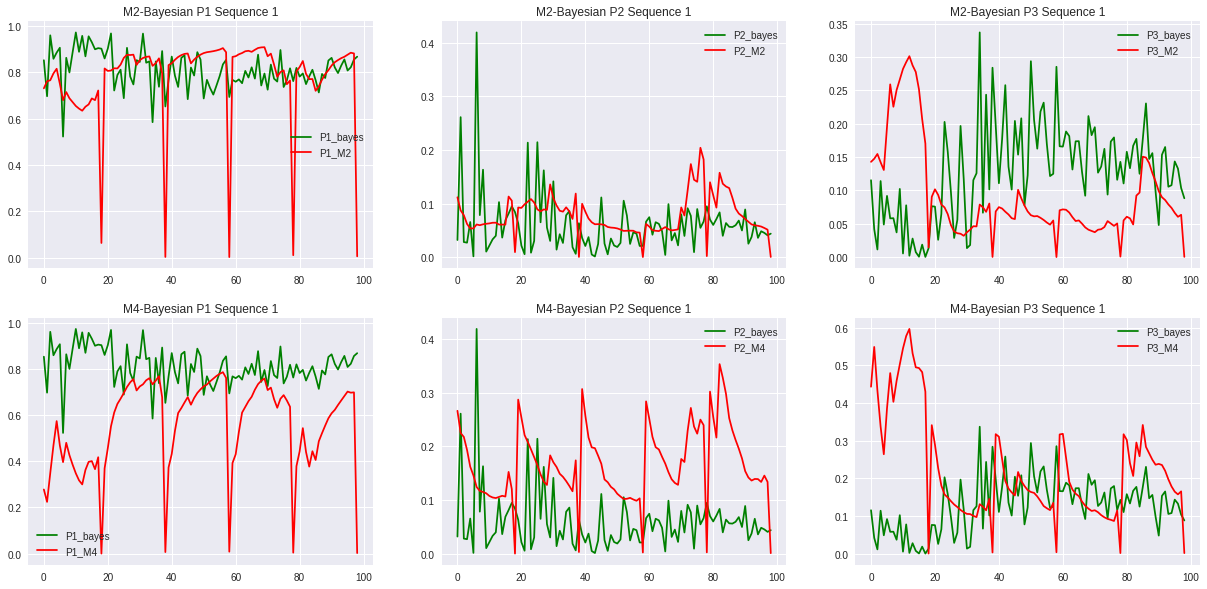

In [20]:
# Visualize and compare performance on the test sequences:

## We plot the probability of one batch
ncols = 3
nrows = 2
_, axes = plt.subplots(nrows, ncols, figsize=(ncols* 7, nrows * 5))
# plot one sample over time

axes[0, 0].plot(bayesian_dict["Data1"][0][0],'g')
axes[0, 0].plot(np.transpose(prob_test_dict["M2"][0])[0],'r')
axes[0, 0].legend(['P1_bayes', 'P1_M2'])
axes[0, 0].set_title("M2-Bayesian P1 Sequence 1")

axes[0, 1].plot(bayesian_dict["Data1"][0][1],'g')
axes[0, 1].plot(np.transpose(prob_test_dict["M2"][0])[1],'r')
axes[0, 1].legend(['P2_bayes', 'P2_M2'])
axes[0, 1].set_title("M2-Bayesian P2 Sequence 1")

axes[0, 2].plot(bayesian_dict["Data1"][0][2],'g')
axes[0, 2].plot(np.transpose(prob_test_dict["M2"][0])[2],'r')
axes[0, 2].legend(['P3_bayes', 'P3_M2'])
axes[0, 2].set_title("M2-Bayesian P3 Sequence 1")

axes[1, 0].plot(bayesian_dict["Data1"][0][0],'g')
axes[1, 0].plot(np.transpose(prob_test_dict["M4"][0])[0],'r')
axes[1, 0].legend(['P1_bayes', 'P1_M4'])
axes[1, 0].set_title("M4-Bayesian P1 Sequence 1")

axes[1, 1].plot(bayesian_dict["Data1"][0][1],'g')
axes[1, 1].plot(np.transpose(prob_test_dict["M4"][0])[1],'r')
axes[1, 1].legend(['P2_bayes', 'P2_M4'])
axes[1, 1].set_title("M4-Bayesian P2 Sequence 1")

axes[1, 2].plot(bayesian_dict["Data1"][0][2],'g')
axes[1, 2].plot(np.transpose(prob_test_dict["M4"][0])[2],'r')
axes[1, 2].legend(['P3_bayes', 'P3_M4'])
axes[1, 2].set_title("M4-Bayesian P3 Sequence 1")

Text(0.5,1,u'M4-Bayesian P3 Sequence 2')

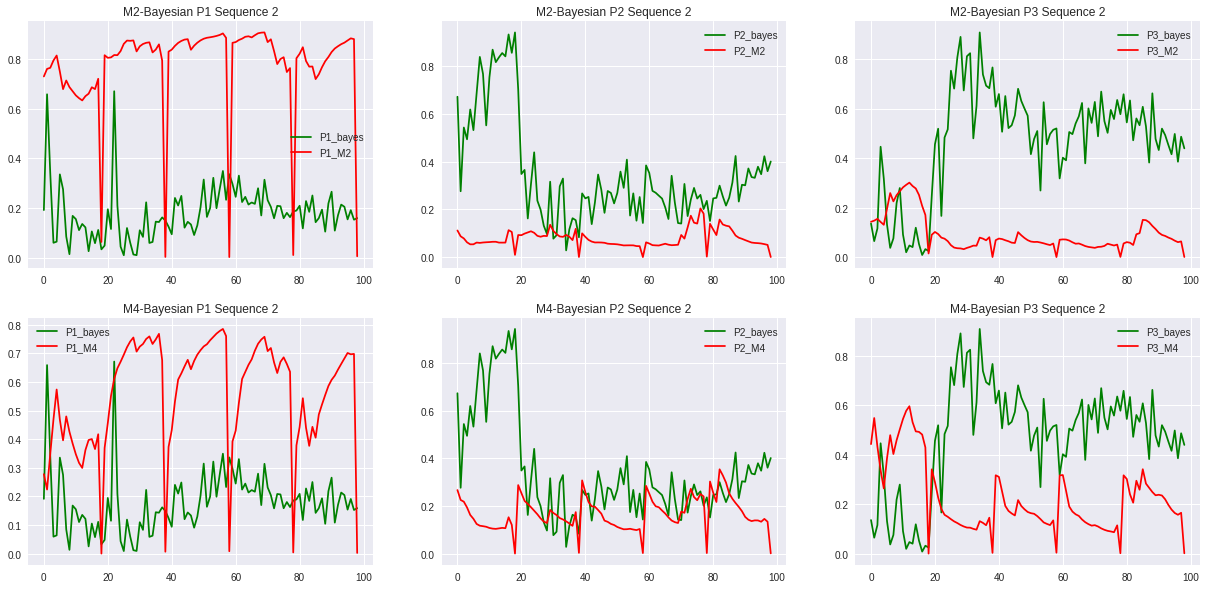

In [21]:
# Visualize and compare performance on the test sequences:

## We plot the probability of one batch
ncols = 3
nrows = 2
_, axes = plt.subplots(nrows, ncols, figsize=(ncols* 7, nrows * 5))
# plot one sample over time

axes[0, 0].plot(bayesian_dict["Data2"][0][0],'g')
axes[0, 0].plot(np.transpose(prob_test_dict["M2"][0])[0],'r')
axes[0, 0].legend(['P1_bayes', 'P1_M2'])
axes[0, 0].set_title("M2-Bayesian P1 Sequence 2")

axes[0, 1].plot(bayesian_dict["Data2"][0][1],'g')
axes[0, 1].plot(np.transpose(prob_test_dict["M2"][0])[1],'r')
axes[0, 1].legend(['P2_bayes', 'P2_M2'])
axes[0, 1].set_title("M2-Bayesian P2 Sequence 2")

axes[0, 2].plot(bayesian_dict["Data2"][0][2],'g')
axes[0, 2].plot(np.transpose(prob_test_dict["M2"][0])[2],'r')
axes[0, 2].legend(['P3_bayes', 'P3_M2'])
axes[0, 2].set_title("M2-Bayesian P3 Sequence 2")

axes[1, 0].plot(bayesian_dict["Data2"][0][0],'g')
axes[1, 0].plot(np.transpose(prob_test_dict["M4"][0])[0],'r')
axes[1, 0].legend(['P1_bayes', 'P1_M4'])
axes[1, 0].set_title("M4-Bayesian P1 Sequence 2")

axes[1, 1].plot(bayesian_dict["Data2"][0][1],'g')
axes[1, 1].plot(np.transpose(prob_test_dict["M4"][0])[1],'r')
axes[1, 1].legend(['P2_bayes', 'P2_M4'])
axes[1, 1].set_title("M4-Bayesian P2 Sequence 2")

axes[1, 2].plot(bayesian_dict["Data2"][0][2],'g')
axes[1, 2].plot(np.transpose(prob_test_dict["M4"][0])[2],'r')
axes[1, 2].legend(['P3_bayes', 'P3_M4'])
axes[1, 2].set_title("M4-Bayesian P3 Sequence 2")

Text(0.5,1,u'M4-Bayesian P3 Sequence 3')

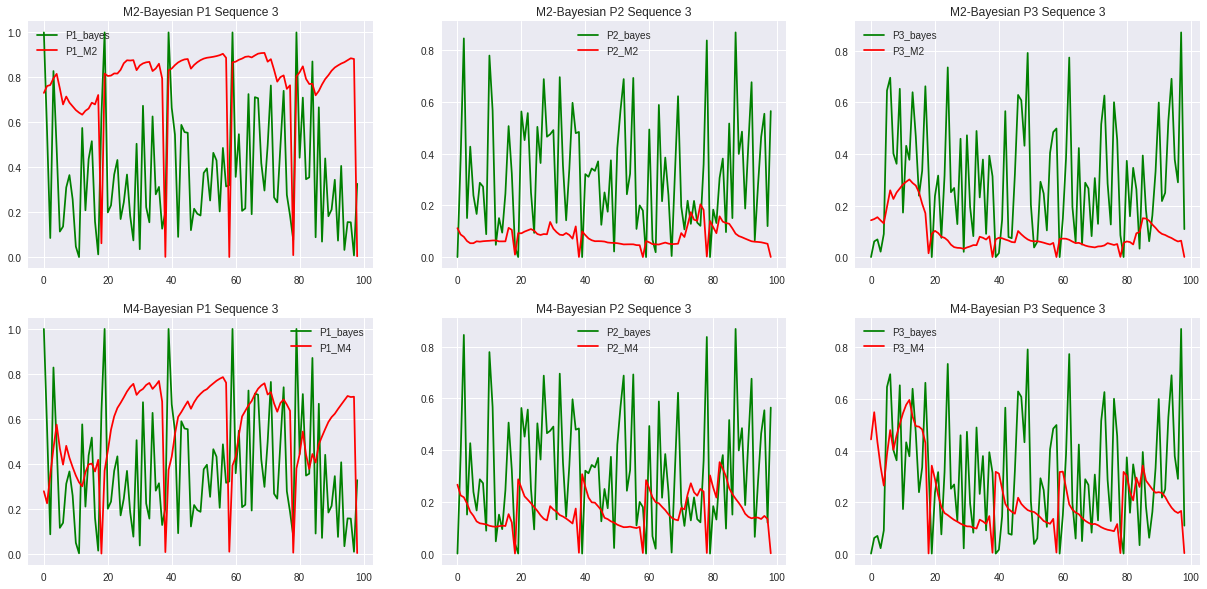

In [27]:
## We plot the probability of one batch
ncols = 3
nrows = 2
_, axes = plt.subplots(nrows, ncols, figsize=(ncols* 7, nrows * 5))
# plot one sample over time

axes[0, 0].plot(bayesian_dict["Data3"][0][0],'g')
axes[0, 0].plot(np.transpose(prob_test_dict["M2"][0])[0],'r')
axes[0, 0].legend(['P1_bayes', 'P1_M2'])
axes[0, 0].set_title("M2-Bayesian P1 Sequence 3")

axes[0, 1].plot(bayesian_dict["Data3"][0][1],'g')
axes[0, 1].plot(np.transpose(prob_test_dict["M2"][0])[1],'r')
axes[0, 1].legend(['P2_bayes', 'P2_M2'])
axes[0, 1].set_title("M2-Bayesian P2 Sequence 3")

axes[0, 2].plot(bayesian_dict["Data3"][0][2],'g')
axes[0, 2].plot(np.transpose(prob_test_dict["M2"][0])[2],'r')
axes[0, 2].legend(['P3_bayes', 'P3_M2'])
axes[0, 2].set_title("M2-Bayesian P3 Sequence 3")

axes[1, 0].plot(bayesian_dict["Data3"][0][0],'g')
axes[1, 0].plot(np.transpose(prob_test_dict["M4"][0])[0],'r')
axes[1, 0].legend(['P1_bayes', 'P1_M4'])
axes[1, 0].set_title("M4-Bayesian P1 Sequence 3")

axes[1, 1].plot(bayesian_dict["Data3"][0][1],'g')
axes[1, 1].plot(np.transpose(prob_test_dict["M4"][0])[1],'r')
axes[1, 1].legend(['P2_bayes', 'P2_M4'])
axes[1, 1].set_title("M4-Bayesian P2 Sequence 3")

axes[1, 2].plot(bayesian_dict["Data3"][0][2],'g')
axes[1, 2].plot(np.transpose(prob_test_dict["M4"][0])[2],'r')
axes[1, 2].legend(['P3_bayes', 'P3_M4'])
axes[1, 2].set_title("M4-Bayesian P3 Sequence 3")